# Step 0: Import Lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score


import xgboost as xgb

import warnings




Populating the interactive namespace from numpy and matplotlib


# Step 1: Load Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rawanmansourr/SportsInjuries/main/Sesstion.csv')

In [3]:
df.head()
#df.columns

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,Athlete ID,injury,Date
0,1,5.8,0.0,0.6,1.2,0,0.00,0.11,0.00,0.18,0,0,0
1,0,0.0,0.0,0.0,0.0,0,0.00,-0.01,-0.01,-0.01,0,0,1
2,1,0.0,0.0,0.0,0.0,1,0.00,0.10,0.00,0.17,0,0,2
3,0,0.0,0.0,0.0,0.0,0,0.00,-0.01,-0.01,-0.01,0,0,3
4,1,0.0,0.0,0.0,0.0,0,1.08,0.08,0.00,0.18,0,0,4


# Step 2: Cleaning Data

#####          A. Columns
1. Relace column it have the "." with "_" 
2. Relace column it have the " " with "_" 
3. Relace column it have the "-" with "_" 
4. Lower Case

In [4]:
df.columns = df.columns.str.replace( '.', '' ).str.replace( '/', '_' ).str.replace( '-', '_' ).str.replace( ' ', '_' ).str.lower().str.strip()

/tmp/ipykernel_40209/3642270442.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace( '.', '' ).str.replace( '/', '_' ).str.replace( '-', '_' ).str.replace( ' ', '_' ).str.lower().str.strip()


In [5]:
df.head()

,nr_sessions,total_km,km_z3_4,km_z5_t1_t2,km_sprinting,strength_training,hours_alternative,perceived_exertion,perceived_trainingsuccess,perceived_recovery,athlete_id,injury,date
0,1,5.8,0.0,0.6,1.2,0,0.00,0.11,0.00,0.18,0,0,0
1,0,0.0,0.0,0.0,0.0,0,0.00,-0.01,-0.01,-0.01,0,0,1
2,1,0.0,0.0,0.0,0.0,1,0.00,0.10,0.00,0.17,0,0,2
3,0,0.0,0.0,0.0,0.0,0,0.00,-0.01,-0.01,-0.01,0,0,3
4,1,0.0,0.0,0.0,0.0,0,1.08,0.08,0.00,0.18,0,0,4


#### B. Row (Cells)
1. There is No Null value in first view
2. When I check the type of data is compatible with columns
3. T

### I Dont use str.replace to my dataset becuse all Data is not Object only Intger and Float

In [6]:
df.isna().sum()

nr_sessions                  0
total_km                     0
km_z3_4                      0
km_z5_t1_t2                  0
km_sprinting                 0
strength_training            0
hours_alternative            0
perceived_exertion           0
perceived_trainingsuccess    0
perceived_recovery           0
athlete_id                   0
injury                       0
date                         0
dtype: int64

In [7]:
df.dtypes

nr_sessions                    int64
total_km                     float64
km_z3_4                      float64
km_z5_t1_t2                  float64
km_sprinting                 float64
strength_training              int64
hours_alternative            float64
perceived_exertion           float64
perceived_trainingsuccess    float64
perceived_recovery           float64
athlete_id                     int64
injury                         int64
date                           int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   nr_sessions                42766 non-null  int64  
 1   total_km                   42766 non-null  float64
 2   km_z3_4                    42766 non-null  float64
 3   km_z5_t1_t2                42766 non-null  float64
 4   km_sprinting               42766 non-null  float64
 5   strength_training          42766 non-null  int64  
 6   hours_alternative          42766 non-null  float64
 7   perceived_exertion         42766 non-null  float64
 8   perceived_trainingsuccess  42766 non-null  float64
 9   perceived_recovery         42766 non-null  float64
 10  athlete_id                 42766 non-null  int64  
 11  injury                     42766 non-null  int64  
 12  date                       42766 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 4.2 MB


In [9]:
df.duplicated().sum()

0

# Setp 3: EDA

### The Target will by <font color='blue'>injury</font>

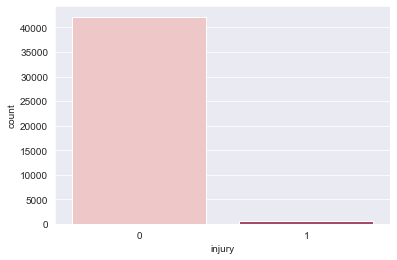

In [10]:
sns.set_style('darkgrid')
sns.countplot( x = 'injury', data = df, palette=["#f4c2c3", "#B43B62"]);

In [11]:
df.describe()

,nr_sessions,total_km,km_z3_4,km_z5_t1_t2,km_sprinting,strength_training,hours_alternative,perceived_exertion,perceived_trainingsuccess,perceived_recovery,athlete_id,injury,date
count,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000
mean,0.829561,7.038187,0.691381,0.579930,0.073016,0.116237,0.163492,0.247788,0.349802,0.195898,34.550858,0.013632,1228.039892
std,0.580696,7.473216,2.317657,1.811938,0.483480,0.326010,0.549664,0.257262,0.368300,0.190321,19.050033,0.115960,807.021168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,20.000000,0.000000,436.000000
50%,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.260000,0.160000,34.000000,0.000000,1256.000000
75%,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440000,0.720000,0.300000,50.000000,0.000000,1913.000000
max,2.000000,55.900000,42.200000,48.000000,40.000000,2.000000,10.220000,1.000000,1.000000,1.000000,73.000000,1.000000,2673.000000


In [12]:
df.injury.describe()

count    42766.000000
mean         0.013632
std          0.115960
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: injury, dtype: float64

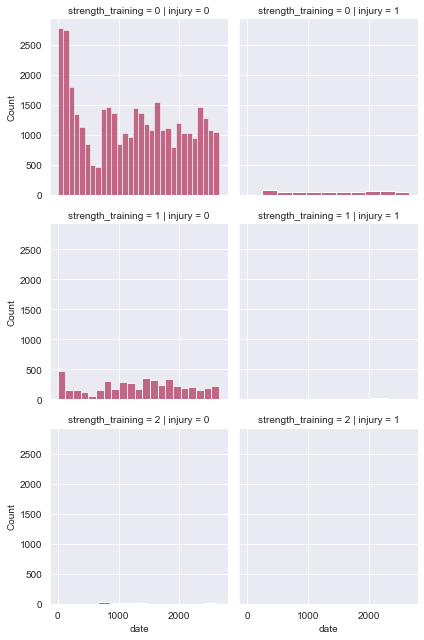

In [13]:
d = {'color': ['#B43B62','#f4c2c3']}
g = sns.FacetGrid(df, col='injury', row='strength_training' , hue_kws=d)
g.map_dataframe(sns.histplot, x= 'date');

In [14]:
#df.duplicated().sum()
#df[col].nunique()
df['injury'].unique()
#df['strength_training'].unique()

array([0, 1])

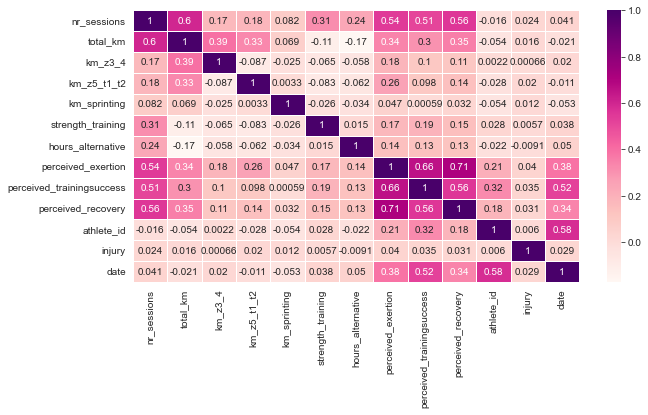

In [15]:
plt.figure(figsize=[10,5])
correct = df.corr()
sns.heatmap(correct, annot=True, linewidths=1, cmap="RdPu");

# Step 4: Model

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8435
           1       0.00      0.00      0.00       119

    accuracy                           0.99      8554
   macro avg       0.49      0.50      0.50      8554
weighted avg       0.97      0.99      0.98      8554



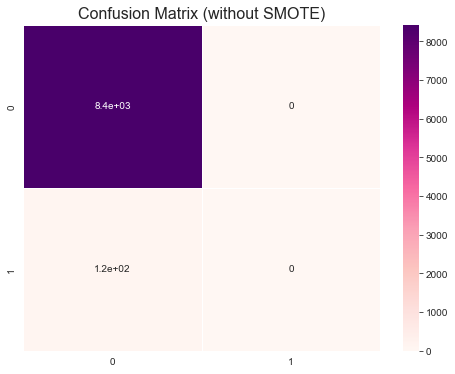

In [33]:

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
x = df.drop(columns=['injury']) 
y = df.injury

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=10) 

lr_model = LogisticRegression() 
lr_model.fit(x_train, y_train) 
y_pred = lr_model.predict(x_test) 

print(classification_report(y_test, y_pred)) 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, linewidths=1, cmap="RdPu");

[08:37:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1637426272325/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.9862052840776245
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8435
           1       0.60      0.03      0.05       119

    accuracy                           0.99      8554
   macro avg       0.79      0.51      0.52      8554
weighted avg       0.98      0.99      0.98      8554



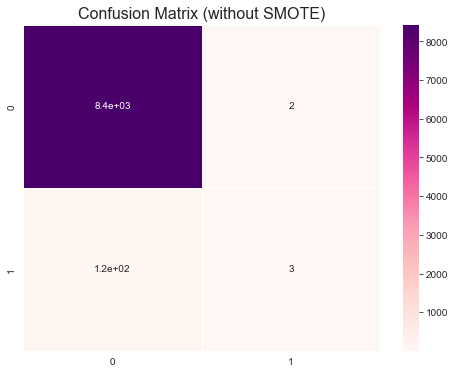

In [25]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

model5 = xgb.XGBClassifier(random_state=1)
model5.fit(x_train, y_train)
y_pred= model5.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, linewidths=1, cmap="RdPu");

Accuracy Score: 0.985854570960954
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8435
           1       0.33      0.02      0.03       119

    accuracy                           0.99      8554
   macro avg       0.66      0.51      0.51      8554
weighted avg       0.98      0.99      0.98      8554



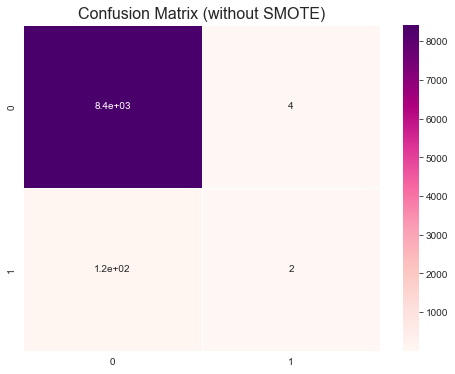

In [36]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, linewidths=1, cmap="RdPu");

Accuracy Score: 0.986088379705401
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8435
           1       0.00      0.00      0.00       119

    accuracy                           0.99      8554
   macro avg       0.49      0.50      0.50      8554
weighted avg       0.97      0.99      0.98      8554



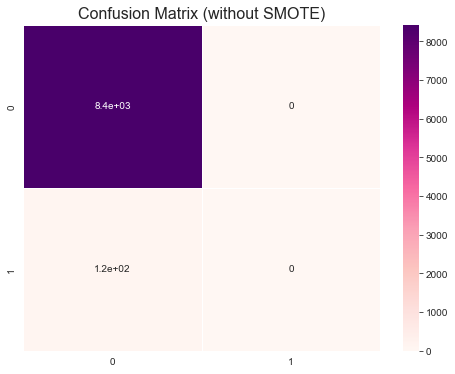

In [18]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
model2 = RandomForestClassifier(random_state=1)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, linewidths=1, cmap="RdPu");


In [19]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)

In [20]:
sm = SMOTE(random_state=42)
x_sm, y_sm =sm.fit_resample(x_train, y_train)

print(f'''Shape of X before SMOTE: {x.shape}
Shape of x after SMOTE: {x_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100




#X = x_sm
#y = y_sm
#pd.value_counts(y).plot.bar()
#plt.title('High Cost Histogram')
#plt.xlabel('Count')
#plt.ylabel('Injury')
#pd.value_counts(y)


Shape of X before SMOTE: (42766, 12)
Shape of x after SMOTE: (67496, 12)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: injury, dtype: float64

<AxesSubplot:xlabel='Injury', ylabel='Count'>

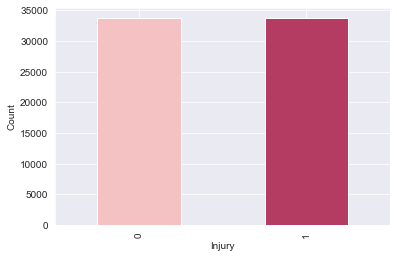

In [21]:
X = x_sm
y = y_sm

#plt.title('High Cost Histogram')
plt.xlabel('Injury')
plt.ylabel('Count')
pd.value_counts(y).plot.bar(color=["#f4c2c3", "#B43B62"])


#sns.set_style('darkgrid')
#sns.countplot( x = 'injury', data = df, palette=["#f4c2c3", "#B43B62"]);

In [34]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
x=df.drop(columns=['injury']) 
y= df.injury

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=10) 
lr_model = LogisticRegression() 
lr_model.fit(x_sm, y_sm) 
y_pred = lr_model.predict(x_sm) 

print("Accuracy Score:",accuracy_score(y_sm,y_pred))

print(classification_report(y_sm, y_pred)) 
cm = confusion_matrix(y_sm, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)

import warningssns.heatmap(cm, annot=True,linewidths=1, cmap="RdPu");

SyntaxError: invalid syntax (3901889746.py, line 18)

[08:40:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1637426272325/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.9860436173995496
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     33748
           1       0.99      0.98      0.99     33748

    accuracy                           0.99     67496
   macro avg       0.99      0.99      0.99     67496
weighted avg       0.99      0.99      0.99     67496



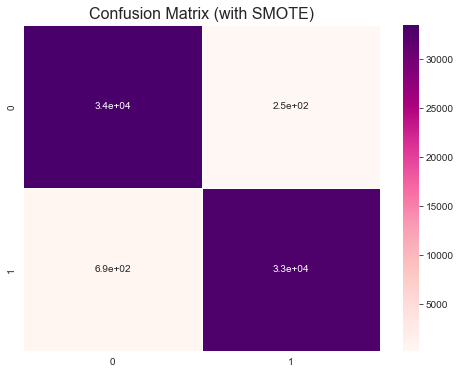

In [27]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

model5 = xgb.XGBClassifier(random_state=1)
model5.fit(x_sm, y_sm)
y_pred= model5.predict(x_sm)


print("Accuracy Score:",accuracy_score(y_sm,y_pred))
print(classification_report(y_sm,y_pred))
cm = confusion_matrix(y_sm, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, linewidths=1, cmap="RdPu");

Accuracy Score: 0.9996888704515823
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33748
           1       1.00      1.00      1.00     33748

    accuracy                           1.00     67496
   macro avg       1.00      1.00      1.00     67496
weighted avg       1.00      1.00      1.00     67496



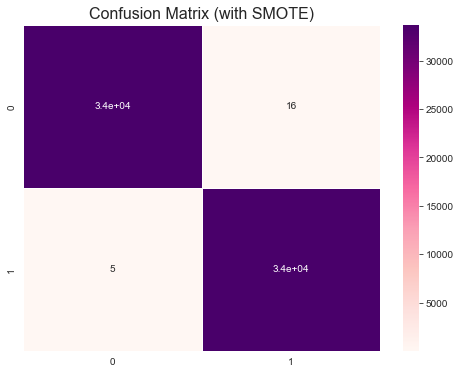

In [28]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
model2 = RandomForestClassifier(random_state=1)

model2.fit(x_sm, y_sm)
y_pred = model2.predict(x_sm)


print("Accuracy Score:",accuracy_score(y_sm,y_pred))
print(classification_report(y_sm,y_pred))
cm = confusion_matrix(y_sm, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, linewidths=1, cmap="RdPu");

Accuracy Score: 0.9766060210975466
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     33748
           1       0.96      1.00      0.98     33748

    accuracy                           0.98     67496
   macro avg       0.98      0.98      0.98     67496
weighted avg       0.98      0.98      0.98     67496



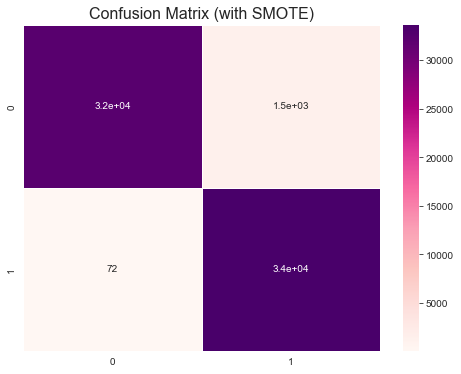

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_sm, y_sm)
y_pred = model.predict(x_sm)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_sm,y_pred))
print(classification_report(y_sm,y_pred))
cm = confusion_matrix(y_sm, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True,  linewidths=1, cmap="RdPu");

In [31]:
results = pd.DataFrame({
    'Model': ['KNN','Logistic Regression','Xgboost'],
    'Score': [0.976,0.863, 0.621]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print(result_df)

                     Model
Score                     
0.976                  KNN
0.863  Logistic Regression
0.621              Xgboost
